# TITANIC Dataset

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:


df=pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.shape

(891, 12)

# Check Missing Value

<Axes: >

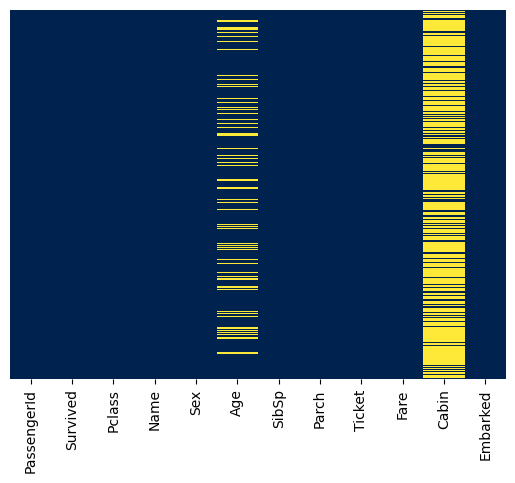

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cividis')

# vusualize Data without Missing Value

<Axes: xlabel='Survived', ylabel='count'>

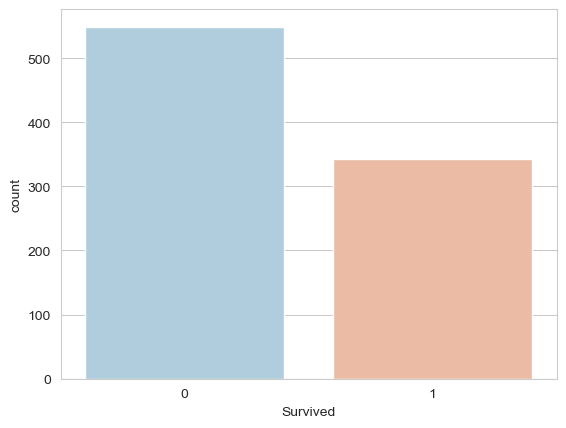

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

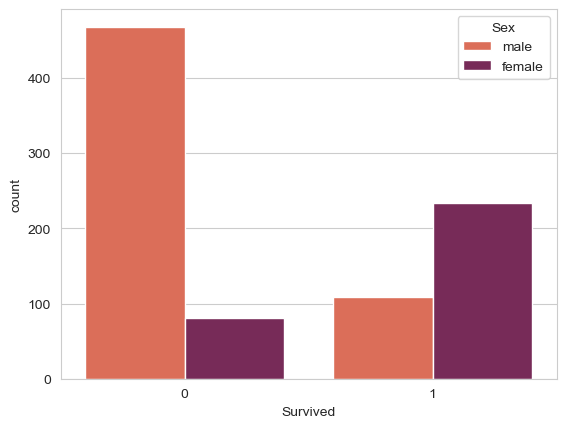

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='rocket_r')

<Axes: xlabel='Survived', ylabel='count'>

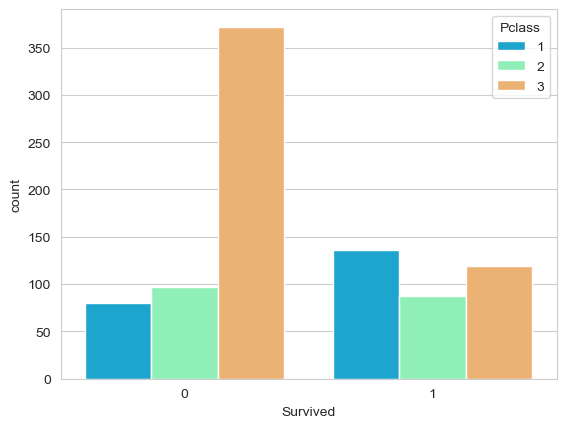

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

# Visualize Missing Data

C:\Users\HP\AppData\Local\Temp\ipykernel_10956\2892631048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=False,bins=30)


<Axes: xlabel='Age'>

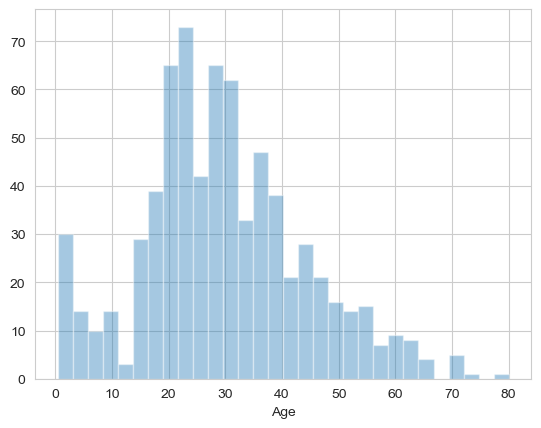

In [14]:
sns.distplot(df['Age'].dropna(),kde=False,bins=30)

<Axes: >

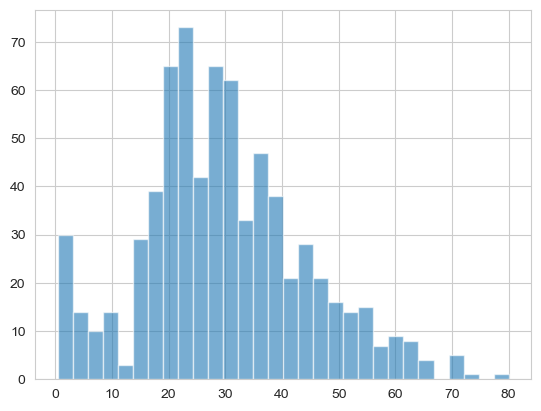

In [15]:
df['Age'].hist(bins=30,alpha=0.6)

<Axes: xlabel='SibSp', ylabel='count'>

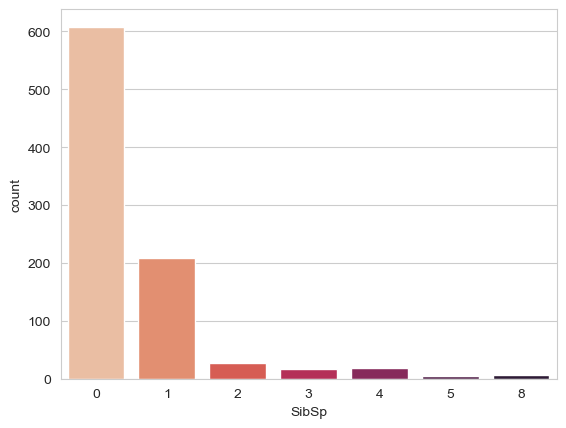

In [16]:
sns.countplot(x='SibSp',data=df,palette='rocket_r')

<Axes: >

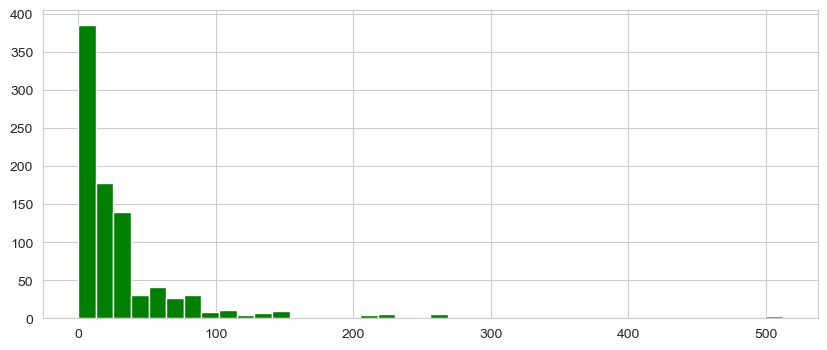

In [17]:
df['Fare'].hist(color='green',bins=40,figsize=(10,4))

# Drop Missing Value with another Value

<Axes: xlabel='Pclass', ylabel='Age'>

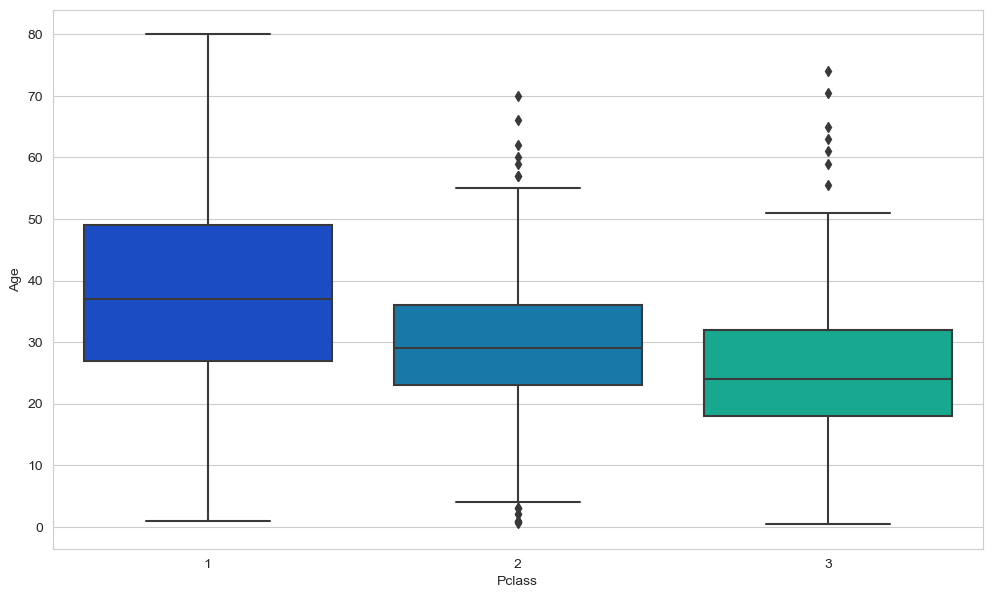

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

# We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age

In [19]:
def impute_age(cols):
    Age=cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

# again Check Missing Value

<Axes: >

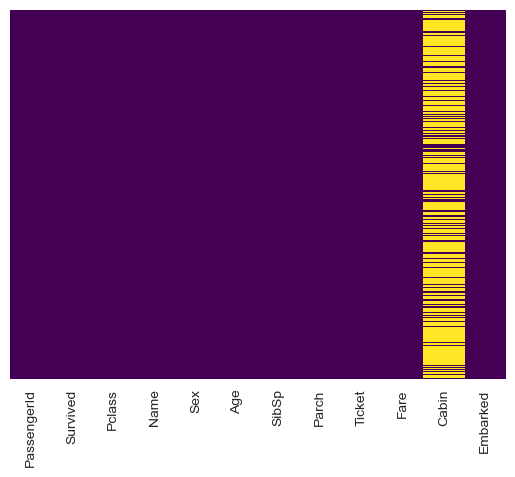

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


# Drop missing Value if has

In [22]:
df.drop('Cabin',axis=1,inplace=True)

In [23]:


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
df.dropna(inplace=True)

#  convert categorical features to dummy variables to directly take features as inputs.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [26]:
sex=pd.get_dummies(df['Sex'])

In [27]:
sex

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [28]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [29]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)


In [30]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
df=pd.concat([df,sex,embark],axis=1)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


# Build Logistic Regression

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



In [40]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test, predictions)
print("Confusion Matrix is:\n",cm)


Confusion Matrix is:
 [[149  14]
 [ 39  65]]


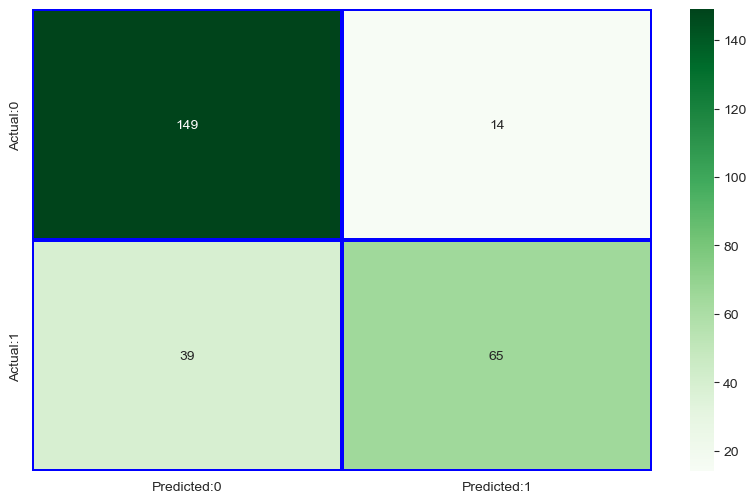

In [41]:
conf_matrix = pd.DataFrame(data = cm,
columns = ['Predicted:0', 'Predicted:1'],
index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue",
linewidths=1.5)
plt.show()

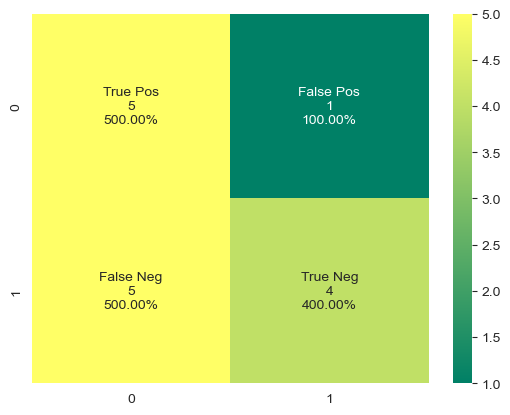

In [42]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predictions)
# Example confusion matrix
conf_matrix = np.array([[5,1], [5,4]])
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='summer')
plt.show()

In [43]:
from sklearn.metrics import classification_report

In [44]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8014981273408239


In [45]:
from sklearn.metrics import precision_score
# Calculate the precision
precision = precision_score(y_test,predictions)
print("Precision:", precision)

Precision: 0.8227848101265823


In [46]:
from sklearn.metrics import  recall_score
# Calculate the recall
recall = recall_score(y_test, predictions)
# Calculate the f1 score
# Print the results
print("Recall:", recall)

Recall: 0.625


In [47]:
import cufflinks as cf
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

In [48]:
df['Fare'].iplot(kind='hist',bins=30,color='green')

AttributeError: 'Series' object has no attribute 'iplot'

# framingham

In [49]:
import numpy as np

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [51]:
df=pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [53]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [54]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [55]:
df.shape

(4238, 16)

In [56]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [57]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: >

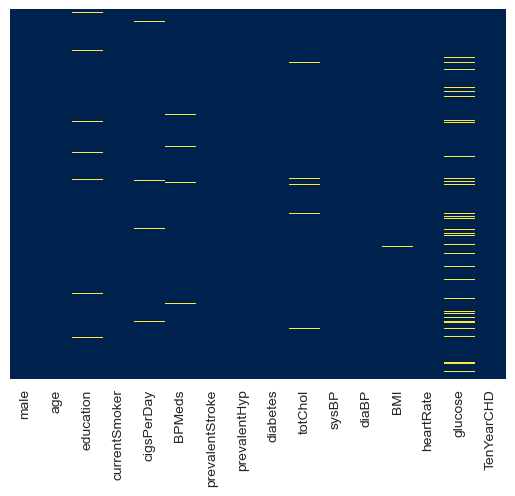

In [58]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cividis')

<Axes: xlabel='TenYearCHD', ylabel='count'>

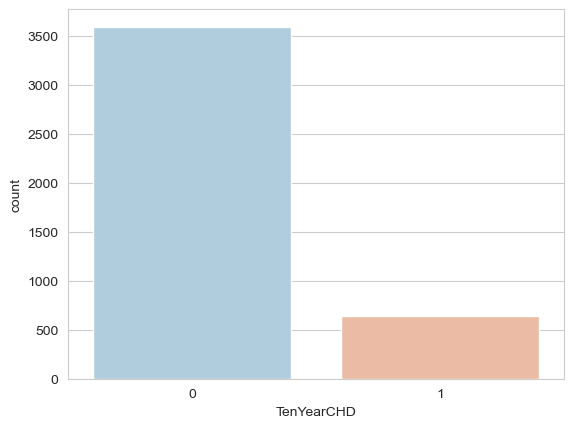

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD',data=df,palette='RdBu_r')

<Axes: xlabel='currentSmoker', ylabel='count'>

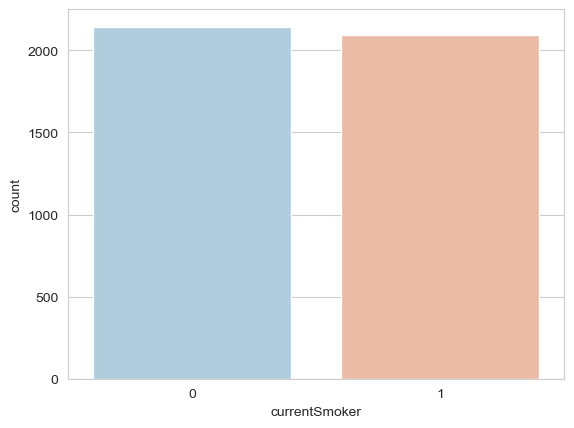

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='currentSmoker',data=df,palette='RdBu_r')

<Axes: xlabel='currentSmoker', ylabel='count'>

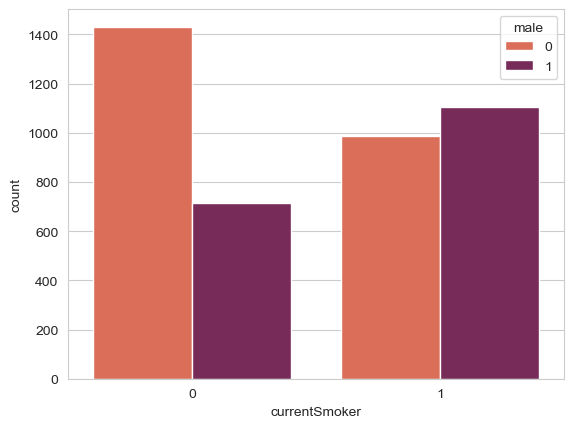

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='currentSmoker',hue='male',data=df,palette='rocket_r')

<Axes: xlabel='currentSmoker', ylabel='count'>

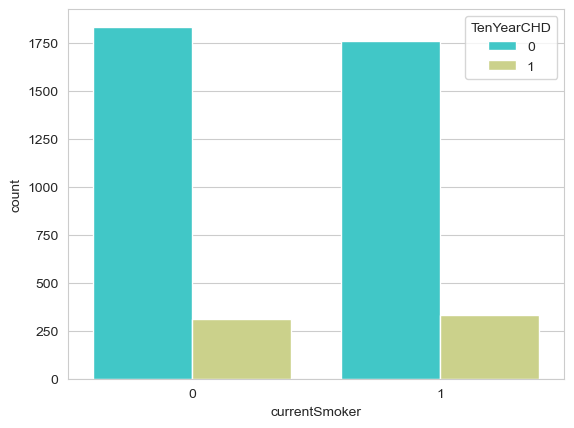

In [62]:
sns.set_style('whitegrid')
sns.countplot(x='currentSmoker',hue='TenYearCHD',data=df,palette='rainbow')

C:\Users\HP\AppData\Local\Temp\ipykernel_10956\1117019450.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['education'].dropna(),kde=False,bins=30)


<Axes: xlabel='education'>

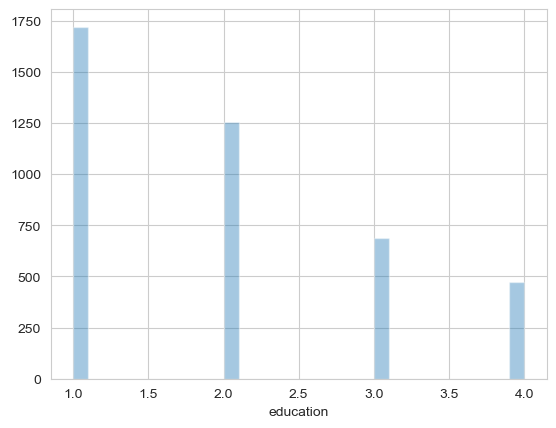

In [63]:
sns.distplot(df['education'].dropna(),kde=False,bins=30)

<Axes: >

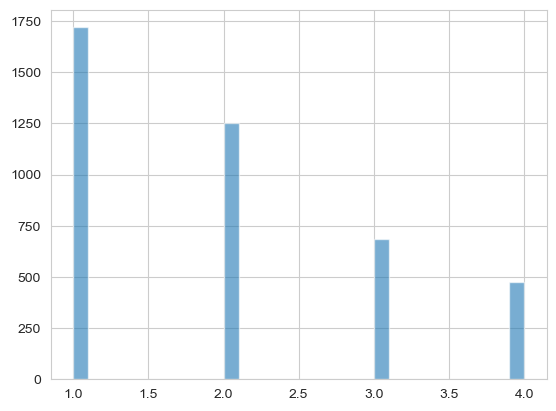

In [64]:
df['education'].hist(bins=30,alpha=0.6)

<Axes: xlabel='TenYearCHD', ylabel='count'>

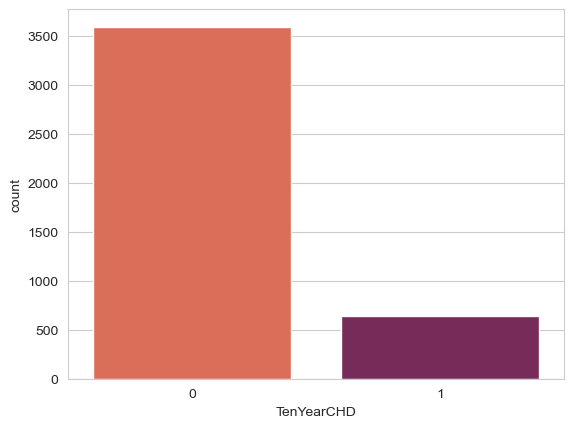

In [65]:
sns.countplot(x='TenYearCHD',data=df,palette='rocket_r')

<Axes: >

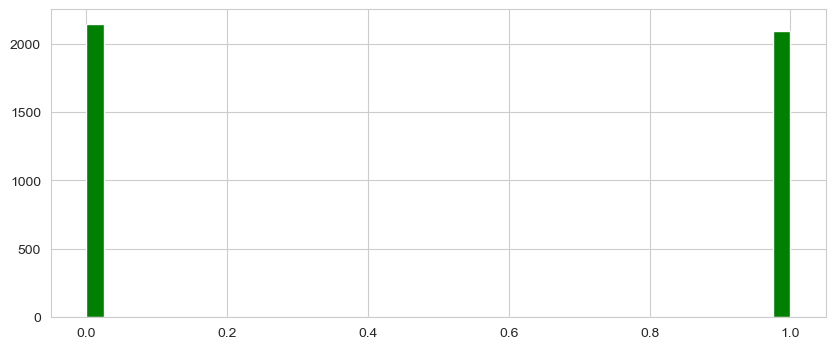

In [66]:
df['currentSmoker'].hist(color='green',bins=40,figsize=(10,4))

<Axes: xlabel='age', ylabel='education'>

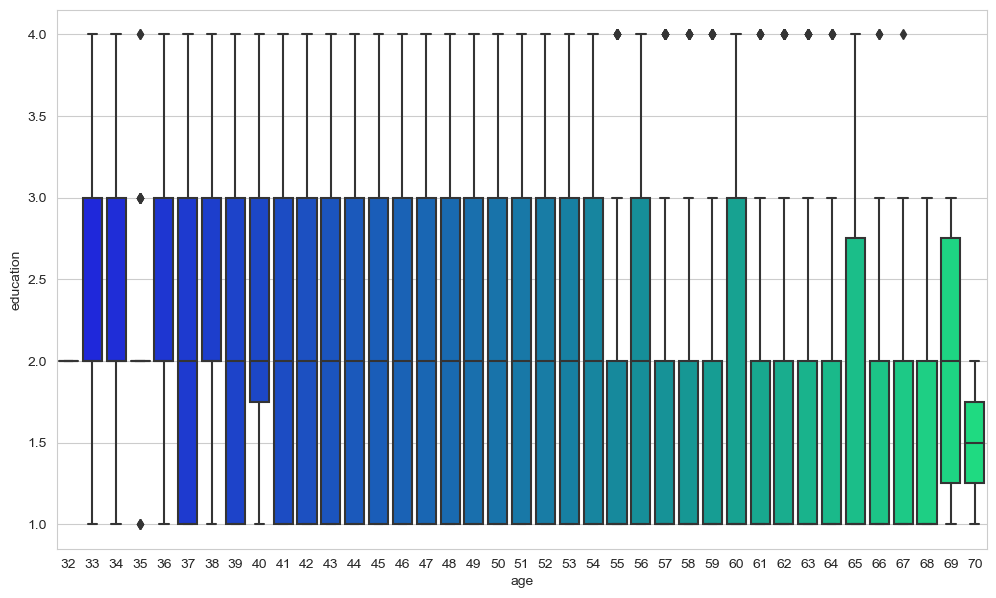

In [67]:
plt.figure(figsize=(12,7))
sns.boxplot(x='age',y='education',data=df,palette='winter')

In [68]:
def impute_age(cols):
    education=cols[0]
    age= cols[1]
    
    if pd.isnull(education):
        
        if age==1:
            return 37
        
        elif age ==2:
            return 29
        else:
            return 24
    else:
        return education

In [69]:
df['education']=df[['education','age']].apply(impute_age,axis=1)

<Axes: >

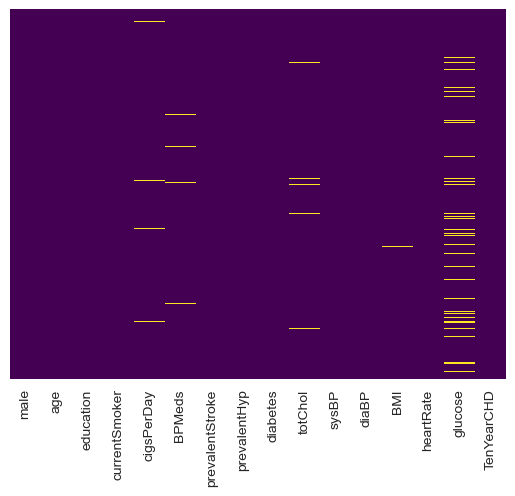

In [70]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [71]:
df.drop('glucose',axis=1,inplace=True)

In [72]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0


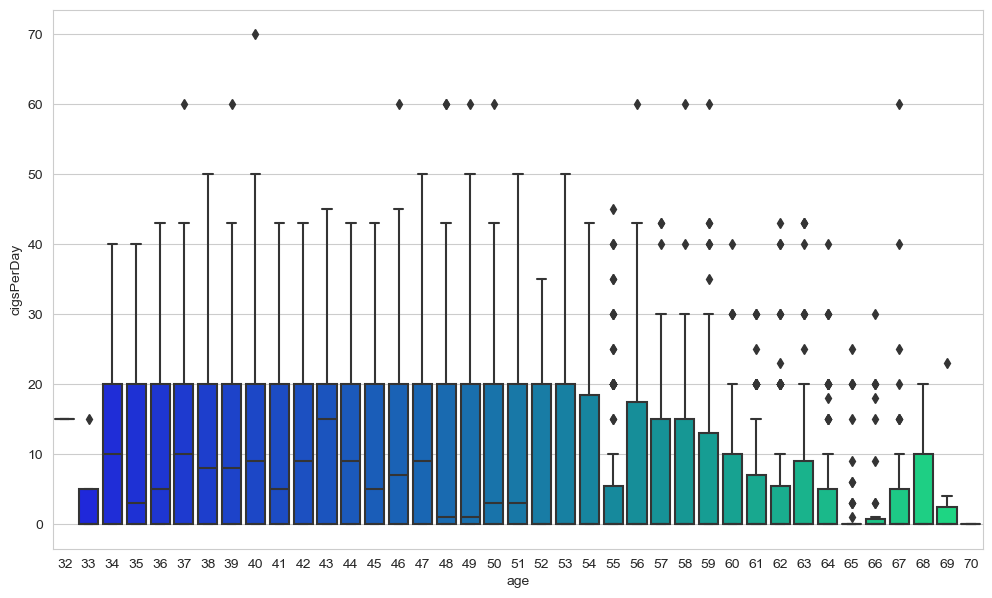

In [73]:
plt.figure(figsize=(12,7))
sns.boxplot(x='age',y='cigsPerDay',data=df,palette='winter')
def impute_age(cols):
    cigsPerDay=cols[0]
    age= cols[1]
    
    if pd.isnull(cigsPerDay):
        
        if age==1:
            return 37
        
        elif age ==2:
            return 29
        else:
            return 24
    else:
        return cigsPerDay
    
df['cigsPerDay']=df[['cigsPerDay','age']].apply(impute_age,axis=1)

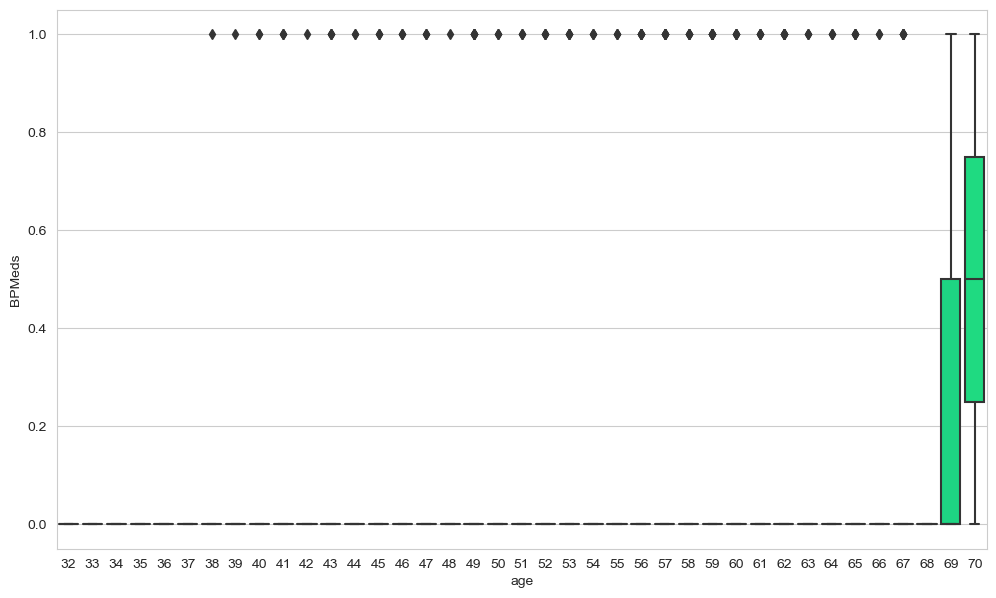

In [74]:
plt.figure(figsize=(12,7))
sns.boxplot(x='age',y='BPMeds',data=df,palette='winter')
def impute_age(cols):
    BPMeds=cols[0]
    age= cols[1]
    
    if pd.isnull(BPMeds):
        
        if age==1:
            return 37
        
        elif age ==2:
            return 29
        else:
            return 24
    else:
        return BPMeds
    
df['BPMeds']=df[['BPMeds','age']].apply(impute_age,axis=1)

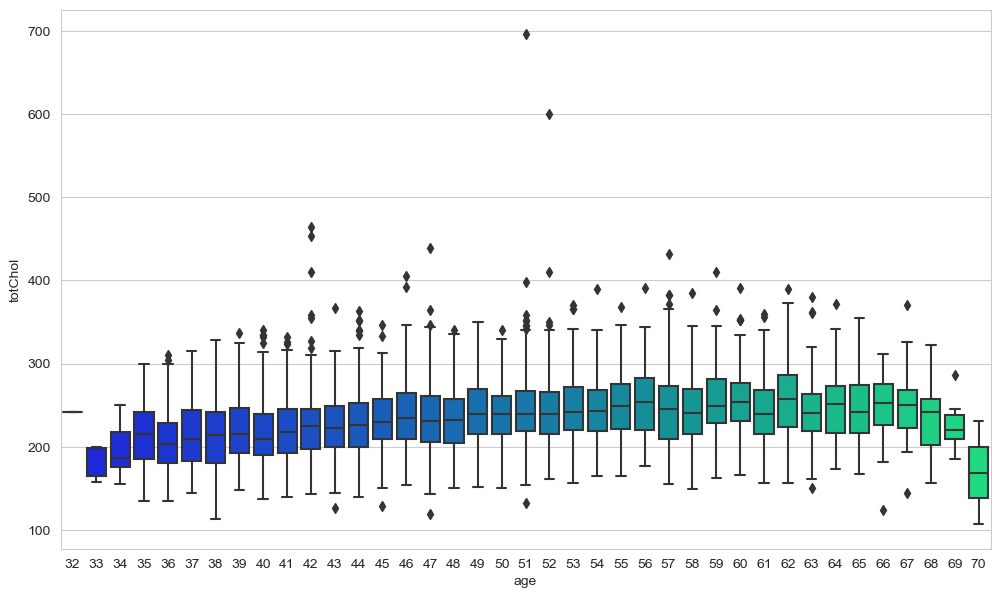

In [75]:
plt.figure(figsize=(12,7))
sns.boxplot(x='age',y='totChol',data=df,palette='winter')
def impute_age(cols):
    totChol=cols[0]
    age= cols[1]
    
    if pd.isnull(totChol):
        
        if age==1:
            return 37
        
        elif age ==2:
            return 29
        else:
            return 24
    else:
        return totChol
    
df['totChol']=df[['totChol','age']].apply(impute_age,axis=1)


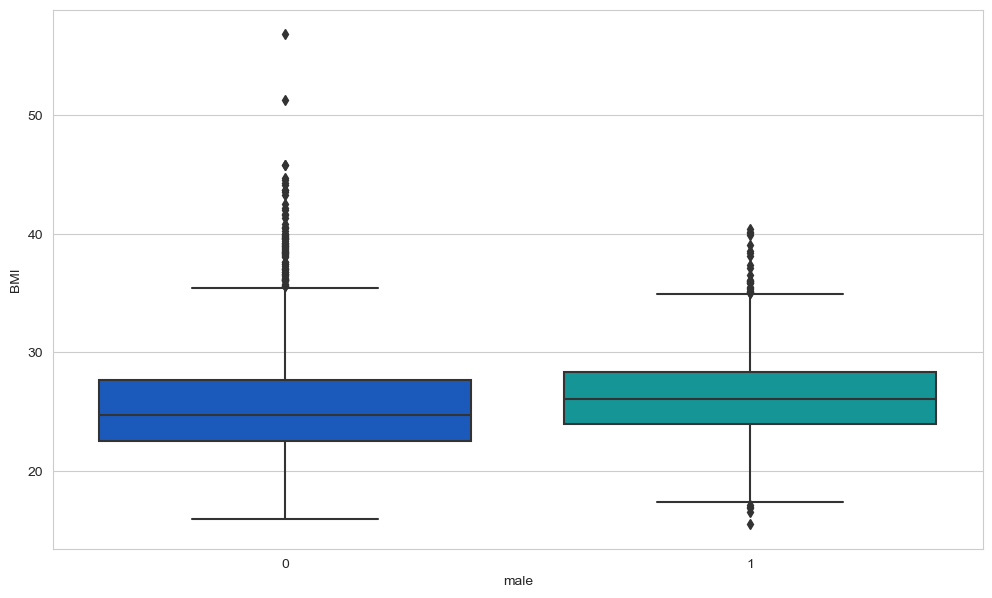

In [76]:
plt.figure(figsize=(12,7))
sns.boxplot(x='male',y='BMI',data=df,palette='winter')
def impute_male(cols):
    BMI=cols[0]
    male= cols[1]
    
    if pd.isnull(BMI):
        
        if male==1:
            return 37
        
        elif male ==2:
            return 29
        else:
            return 24
    else:
        return BMI
    
df['BMI']=df[['BMI','male']].apply(impute_age,axis=1)


<Axes: >

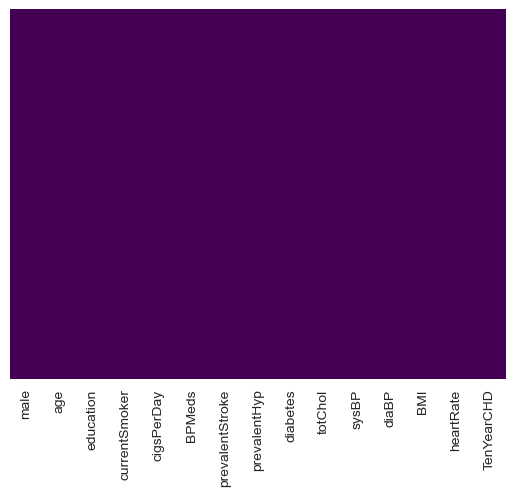

In [77]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [78]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0


In [79]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,0
4235,0,48,2.0,1,20.0,24.0,0,0,0,248.0,131.0,72.0,22.00,84.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0


In [80]:
df.dropna(inplace=True)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('TenYearCHD',axis=1), 
                                                    df['TenYearCHD'], test_size=0.30, 
                                                    random_state=101)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
predictions = logmodel.predict(X_test)

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1096
           1       0.17      0.01      0.02       176

    accuracy                           0.86      1272
   macro avg       0.51      0.50      0.47      1272
weighted avg       0.77      0.86      0.80      1272



In [87]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test, predictions)
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[1086   10]
 [ 174    2]]


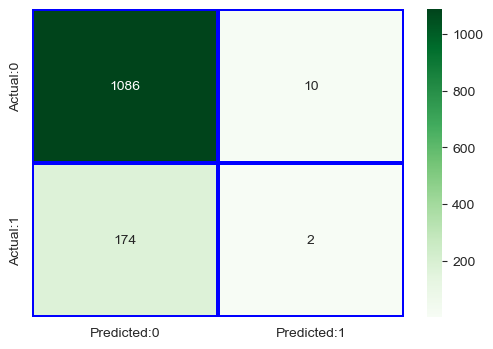

In [88]:
conf_matrix = pd.DataFrame(data = cm,
columns = ['Predicted:0', 'Predicted:1'],
index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue",
linewidths=1.5)
plt.show()

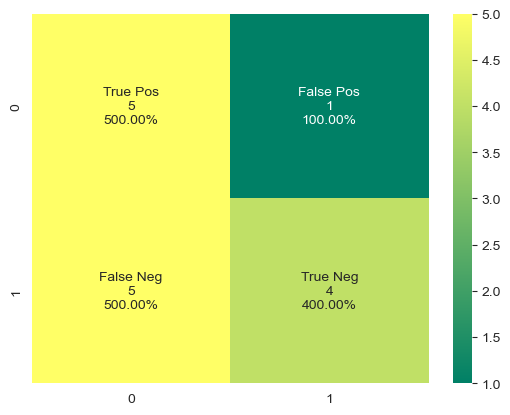

In [89]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predictions)
# Example confusion matrix
conf_matrix = np.array([[5,1], [5,4]])
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='summer')
plt.show()

In [90]:
from sklearn.metrics import classification_report

In [91]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8553459119496856


In [92]:
from sklearn.metrics import precision_score
# Calculate the precision
precision = precision_score(y_test,predictions)
print("Precision:", precision)

Precision: 0.16666666666666666


In [93]:
from sklearn.metrics import  recall_score
# Calculate the recall
recall = recall_score(y_test, predictions)
# Calculate the f1 score
# Print the results
print("Recall:", recall)

Recall: 0.011363636363636364


# HAR

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [95]:
xtrain=pd.read_table('X_train.txt',delim_whitespace=True,header=None)

In [96]:
xtest=pd.read_table('X_test.txt',delim_whitespace=True,header=None)

In [97]:
ytrain=pd.read_table('y_train.txt',header=None)

In [98]:
ytest=pd.read_table('y_test.txt',header=None)

In [99]:
#converting into array
xtrain=xtrain.values 
xtest=xtest.values
ytrain=ytrain.values
ytest=ytest.values

In [100]:
 LogisticRegression().fit(xtrain, ytrain)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
from sklearn.linear_model import LogisticRegression
classifier = []
for i in np.arange(0.1, 1.1 , 0.1):
    for y in ["l1", 'l2']:
        classifier= LogisticRegression(random_state = 5, max_iter=1000, C=i, penalty = y, solver = 'liblinear')
        classifier.fit(xtrain, ytrain)
        print("Training Score = " + str(classifier.score(xtrain, ytrain)))
        print("Test Score = " + str(classifier.score(xtest, ytest)))
        print("C = " + str(i) + ", penalty = " + str(y))
        print("=========================")
        

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9755168661588683
Test Score = 0.9531727180183237
C = 0.1, penalty = l1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9813656147986942
Test Score = 0.9582626399728538
C = 0.1, penalty = l2


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.983949945593036
Test Score = 0.9589412962334578
C = 0.2, penalty = l1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9862622415669206
Test Score = 0.9602986087546658
C = 0.2, penalty = l2


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9870783460282916
Test Score = 0.9616559212758737
C = 0.30000000000000004, penalty = l1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9880304678998912
Test Score = 0.9613165931455717
C = 0.30000000000000004, penalty = l2


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9889825897714908
Test Score = 0.9592806243637597
C = 0.4, penalty = l1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9889825897714908
Test Score = 0.9616559212758737
C = 0.4, penalty = l2


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9900707290533188
Test Score = 0.9602986087546658
C = 0.5, penalty = l1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9895266594124048
Test Score = 0.9616559212758737
C = 0.5, penalty = l2


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9902067464635473
Test Score = 0.9613165931455717
C = 0.6, penalty = l1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9900707290533188
Test Score = 0.9613165931455717
C = 0.6, penalty = l2


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9904787812840044
Test Score = 0.9623345775364778
C = 0.7000000000000001, penalty = l1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9903427638737758
Test Score = 0.9613165931455717
C = 0.7000000000000001, penalty = l2


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9910228509249184
Test Score = 0.9626739056667798
C = 0.8, penalty = l1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9904787812840044
Test Score = 0.9616559212758737
C = 0.8, penalty = l2


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9914309031556039
Test Score = 0.9626739056667798
C = 0.9, penalty = l1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9906147986942329
Test Score = 0.9626739056667798
C = 0.9, penalty = l2


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9917029379760609
Test Score = 0.9619952494061758
C = 1.0, penalty = l1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score = 0.9908868335146899
Test Score = 0.9619952494061758
C = 1.0, penalty = l2


In [102]:
print("Training Score = " + str(classifier.score(xtrain, ytrain)))
print("Test Score = " + str(classifier.score(xtest, ytest)))

Training Score = 0.9908868335146899
Test Score = 0.9619952494061758


In [103]:
ypred = classifier.predict(xtest)
ypred

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [104]:
ytest

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
print(confusion_matrix(ytest, ypred))

[[494   0   2   0   0   0]
 [ 23 448   0   0   0   0]
 [  4   9 407   0   0   0]
 [  0   4   0 432  55   0]
 [  2   0   0  13 517   0]
 [  0   0   0   0   0 537]]


In [107]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97       496
           2       0.97      0.95      0.96       471
           3       1.00      0.97      0.98       420
           4       0.97      0.88      0.92       491
           5       0.90      0.97      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



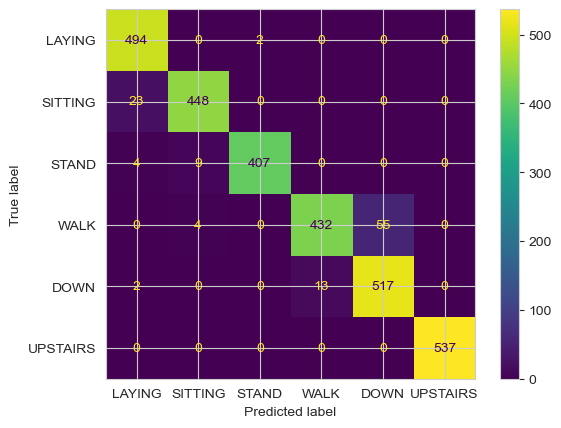

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from numpy.random import default_rng

conf_matrix =confusion_matrix(ytest, ypred)
vis=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=['LAYING','SITTING', 'STAND', 'WALK', 'DOWN',
       'UPSTAIRS'])
vis.plot()

# UCI

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [111]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [112]:
print("Any missing sample in training set:",train_data.isnull().values.any())
print("Any missing sample in test set:",test_data.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



In [113]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [114]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [115]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [116]:
train_data.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [117]:
train_outcome = pd.crosstab(index=train_data["Activity"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


<Axes: xlabel='Activity', ylabel='count'>

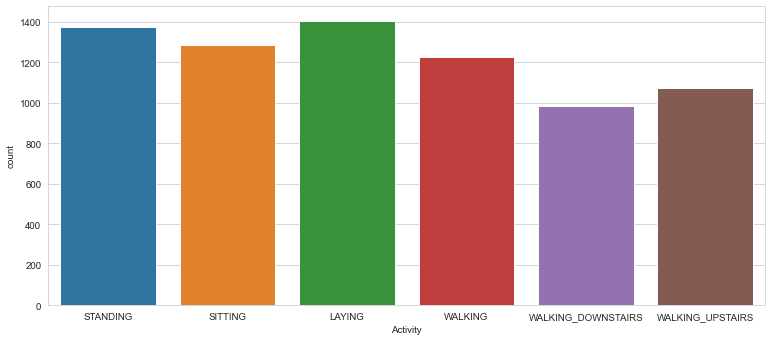

In [118]:
plt.figure(dpi = 70)
plt.subplots_adjust(left=0.9,right=2.5, top = 1)

sns.countplot(x="Activity", data = train_data)

In [119]:
x_train = train_data.drop("Activity", axis = 1).values
y_train = train_data["Activity"].values

In [120]:
x_test = test_data.drop("Activity", axis = 1).values
y_test = test_data["Activity"].values

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [122]:
from sklearn.linear_model import LogisticRegression
classifier = []
for i in np.arange(0.1, 1.1 , 0.1):
    for y in ["l1", 'l2']:
        classifier= LogisticRegression(random_state = 5, max_iter=1000, C=i, penalty = y, solver = 'liblinear')
        classifier.fit(x_train, y_train)
        print("Training Score = " + str(classifier.score(x_train, y_train)))
        print("Test Score = " + str(classifier.score(x_test, y_test)))
        print("C = " + str(i) + ", penalty = " + str(y))
        print("=========================")
        

Training Score = 0.9865342763873776
Test Score = 0.9504580929759077
C = 0.1, penalty = l1
Training Score = 0.9888465723612623
Test Score = 0.9592806243637597
C = 0.1, penalty = l2
Training Score = 0.9904787812840044
Test Score = 0.9569053274516457
C = 0.2, penalty = l1
Training Score = 0.9907508161044614
Test Score = 0.9602986087546658
C = 0.2, penalty = l2
Training Score = 0.9922470076169749
Test Score = 0.9589412962334578
C = 0.30000000000000004, penalty = l1
Training Score = 0.9915669205658324
Test Score = 0.9606379368849678
C = 0.30000000000000004, penalty = l2
Training Score = 0.9931991294885746
Test Score = 0.9592806243637597
C = 0.4, penalty = l1
Training Score = 0.9921109902067464
Test Score = 0.9606379368849678
C = 0.4, penalty = l2
Training Score = 0.9937431991294886
Test Score = 0.9582626399728538
C = 0.5, penalty = l1
Training Score = 0.9926550598476604
Test Score = 0.9599592806243638
C = 0.5, penalty = l2
Training Score = 0.9944232861806311
Test Score = 0.9579233118425518


In [123]:
print("Training Score = " + str(classifier.score(x_train, y_train)))
print("Test Score = " + str(classifier.score(x_test, y_test)))

Training Score = 0.9944232861806311
Test Score = 0.9613165931455717


In [124]:
kernal_evals = dict()
def evaluate_classification(model, name, x_train, x_test, y_train, y_test):
    actual = y_test
    predicted = model.predict(x_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(8,8))
    ax.grid(False)
    cm_display.plot(ax=ax)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


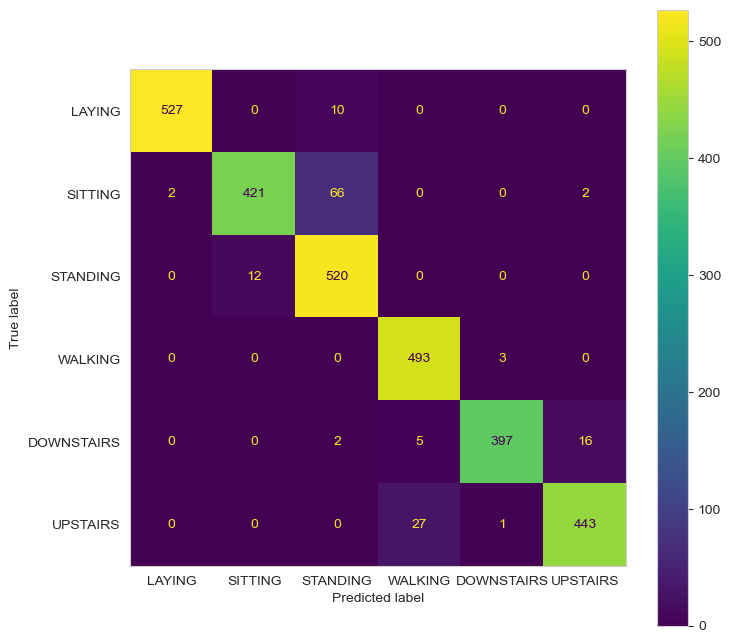

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

In [129]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    
    
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
   
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

Training Accuracy Logistic Regression 99.60554951033733  Test Accuracy Logistic Regression 95.04580929759076
Training Precesion Logistic Regression 99.60554951033733  Test Precesion Logistic Regression 95.04580929759076
Training Recall Logistic Regression 99.60554951033733  Test Recall Logistic Regression 95.04580929759076
